# 📊 Weekly Aggregation by Entity

Create feature-rich weekly dataset where each row = 1 week for 1 entity.
Week numbering: Jan 1-7 = Week 1, Jan 8-14 = Week 2, etc.

In [31]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load clean data
df = pd.read_csv('../processed_data/clean_transactions.csv')
df['Pstng Date'] = pd.to_datetime(df['Pstng Date'], format='mixed')
print(f"Total transactions: {len(df):,}")
print(f"Date range: {df['Pstng Date'].min()} to {df['Pstng Date'].max()}")
print(f"Entities: {df['Name'].unique()}")

Total transactions: 84,528
Date range: 2025-01-02 00:00:00 to 2025-10-31 00:00:00
Entities: ['TW10' 'PH10' 'TH10' 'ID10' 'SS10' 'MY10' 'VN20' 'KR10']


## 1. Create Fixed Week Numbers (Jan 1-7 = Week 1)

In [33]:
# Define start of year
year_start = datetime(2025, 1, 1)

# Calculate week number from Jan 1 (Week 1 = Jan 1-7, Week 2 = Jan 8-14, etc.)
df['Days_From_Start'] = (df['Pstng Date'] - year_start).dt.days
df['Week_Num'] = (df['Days_From_Start'] // 7) + 1

# Calculate week start and end dates
df['Week_Start'] = year_start + pd.to_timedelta((df['Week_Num'] - 1) * 7, unit='D')
df['Week_End'] = df['Week_Start'] + timedelta(days=6)

print(f"Week range: Week {df['Week_Num'].min()} to Week {df['Week_Num'].max()}")
df[['Pstng Date', 'Week_Num', 'Week_Start', 'Week_End']].head(10)

Week range: Week 1 to Week 44


,Pstng Date,Week_Num,Week_Start,Week_End
0,2025-08-01,31,2025-07-30,2025-08-05
1,2025-08-01,31,2025-07-30,2025-08-05
2,2025-08-01,31,2025-07-30,2025-08-05
3,2025-08-01,31,2025-07-30,2025-08-05
4,2025-08-01,31,2025-07-30,2025-08-05
5,2025-08-01,31,2025-07-30,2025-08-05
6,2025-08-01,31,2025-07-30,2025-08-05
7,2025-08-01,31,2025-07-30,2025-08-05
8,2025-08-02,31,2025-07-30,2025-08-05
9,2025-08-02,31,2025-07-30,2025-08-05


In [34]:
# Week reference table
week_ref = df.groupby('Week_Num').agg(
    Week_Start=('Week_Start', 'first'),
    Week_End=('Week_End', 'first'),
    Transactions=('Amount in USD', 'count')
).reset_index()
week_ref['Week_Label'] = week_ref.apply(lambda x: f"W{x['Week_Num']} ({x['Week_Start'].strftime('%b %d')} - {x['Week_End'].strftime('%b %d')})", axis=1)
print(f"Total weeks: {len(week_ref)}")
display(week_ref)

Total weeks: 44


,Week_Num,Week_Start,Week_End,Transactions,Week_Label
0,1,2025-01-01,2025-01-07,1325,W1 (Jan 01 - Jan 07)
1,2,2025-01-08,2025-01-14,1999,W2 (Jan 08 - Jan 14)
2,3,2025-01-15,2025-01-21,2275,W3 (Jan 15 - Jan 21)
3,4,2025-01-22,2025-01-28,1119,W4 (Jan 22 - Jan 28)
4,5,2025-01-29,2025-02-04,1612,W5 (Jan 29 - Feb 04)
5,6,2025-02-05,2025-02-11,1655,W6 (Feb 05 - Feb 11)
6,7,2025-02-12,2025-02-18,2176,W7 (Feb 12 - Feb 18)
7,8,2025-02-19,2025-02-25,1954,W8 (Feb 19 - Feb 25)
8,9,2025-02-26,2025-03-04,1623,W9 (Feb 26 - Mar 04)
9,10,2025-03-05,2025-03-11,1635,W10 (Mar 05 - Mar 11)


## 2. Create Feature-Rich Weekly Dataset by Entity

In [35]:
# Get all unique entities and weeks
entities = df['Name'].unique()
weeks = sorted(df['Week_Num'].unique())
categories = df['Category'].unique()

print(f"Entities: {entities}")
print(f"Weeks: {len(weeks)}")
print(f"Categories: {categories}")

Entities: ['TW10' 'PH10' 'TH10' 'ID10' 'SS10' 'MY10' 'VN20' 'KR10']
Weeks: 44
Categories: ['AP' 'Payroll' 'Bank charges' 'Custom and Duty' 'Other receipt' 'AR'
 'Non Netting AP' 'Loan payment' 'Tax payable' 'Statutory contribution'
 'Interest income' 'Other' 'Interest charges'
 'Loan payment and interest charges' 'Loan receipt' 'Dividend payout'
 'Netting AP' 'Netting AR' 'Non Netting AR']


In [36]:
# Create weekly aggregation for each entity
weekly_data = []

for entity in entities:
    entity_df = df[df['Name'] == entity]
    
    for week in weeks:
        week = int(week)  # FIX: Convert numpy.int64 to Python int
        week_df = entity_df[entity_df['Week_Num'] == week]
        
        # Basic info
        row = {
            'Entity': entity,
            'Week_Num': week,
            'Week_Start': year_start + pd.Timedelta(days=(week-1)*7),  # Use pd.Timedelta instead
            'Week_End': year_start + pd.Timedelta(days=week*7-1),      # Use pd.Timedelta instead
        }
        
        # Overall metrics
        row['Total_Net'] = week_df['Amount in USD'].sum()
        row['Total_Inflow'] = week_df[week_df['Amount in USD'] > 0]['Amount in USD'].sum()
        row['Total_Outflow'] = week_df[week_df['Amount in USD'] < 0]['Amount in USD'].sum()
        row['Outflow_Abs'] = abs(row['Total_Outflow'])
        row['Transaction_Count'] = len(week_df)
        row['Inflow_Count'] = len(week_df[week_df['Amount in USD'] > 0])
        row['Outflow_Count'] = len(week_df[week_df['Amount in USD'] < 0])
        
        # Average transaction size
        row['Avg_Transaction'] = week_df['Amount in USD'].mean() if len(week_df) > 0 else 0
        row['Avg_Inflow'] = week_df[week_df['Amount in USD'] > 0]['Amount in USD'].mean() if row['Inflow_Count'] > 0 else 0
        row['Avg_Outflow'] = week_df[week_df['Amount in USD'] < 0]['Amount in USD'].mean() if row['Outflow_Count'] > 0 else 0
        
        # Max/Min transactions
        row['Max_Transaction'] = week_df['Amount in USD'].max() if len(week_df) > 0 else 0
        row['Min_Transaction'] = week_df['Amount in USD'].min() if len(week_df) > 0 else 0
        
        # Category breakdowns (net amount per category)
        for cat in categories:
            cat_df = week_df[week_df['Category'] == cat]
            row[f'Cat_{cat}_Net'] = cat_df['Amount in USD'].sum()
            row[f'Cat_{cat}_Count'] = len(cat_df)
        
        # PK breakdown (40 = Debit/Inflow, 50 = Credit/Outflow)
        row['PK40_Amount'] = week_df[week_df['PK'] == 40]['Amount in USD'].sum()
        row['PK50_Amount'] = week_df[week_df['PK'] == 50]['Amount in USD'].sum()
        row['PK40_Count'] = len(week_df[week_df['PK'] == 40])
        row['PK50_Count'] = len(week_df[week_df['PK'] == 50])
        
        weekly_data.append(row)

# Create DataFrame
weekly_df = pd.DataFrame(weekly_data)
print(f"Created: {len(weekly_df)} rows (entities x weeks)")
weekly_df.head()

Created: 352 rows (entities x weeks)


,Entity,Week_Num,Week_Start,Week_End,Total_Net,Total_Inflow,Total_Outflow,Outflow_Abs,Transaction_Count,Inflow_Count,...,Cat_Netting AP_Net,Cat_Netting AP_Count,Cat_Netting AR_Net,Cat_Netting AR_Count,Cat_Non Netting AR_Net,Cat_Non Netting AR_Count,PK40_Amount,PK50_Amount,PK40_Count,PK50_Count
0,TW10,1,2025-01-01,2025-01-07,83005.03169,1.666441e+05,-8.363905e+04,8.363905e+04,296,9,...,0.0,0,0.0,0,0.0,0,1.666441e+05,-8.363905e+04,9,287
1,TW10,2,2025-01-08,2025-01-14,-362359.60239,2.734836e+01,-3.623870e+05,3.623870e+05,351,2,...,0.0,0,0.0,0,0.0,0,2.734836e+01,-3.623870e+05,2,349
2,TW10,3,2025-01-15,2025-01-21,-359634.79395,1.102441e+03,-3.607372e+05,3.607372e+05,495,3,...,0.0,0,0.0,0,0.0,0,1.102441e+03,-3.607372e+05,3,492
3,TW10,4,2025-01-22,2025-01-28,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0,0,...,0.0,0,0.0,0,0.0,0,0.000000e+00,0.000000e+00,0,0
4,TW10,5,2025-01-29,2025-02-04,-279493.04741,2.334788e+06,-2.614281e+06,2.614281e+06,444,7,...,-2502320.7,1,0.0,0,0.0,0,2.334788e+06,-2.614281e+06,7,437


In [37]:
# Fill NaN with 0 (for weeks with no transactions)
weekly_df = weekly_df.fillna(0)

# Add time features
weekly_df['Month'] = weekly_df['Week_Start'].dt.month
weekly_df['Week_of_Month'] = ((weekly_df['Week_Start'].dt.day - 1) // 7) + 1
weekly_df['Is_Month_End'] = weekly_df['Week_Start'].dt.day > 21  # Last week of month
weekly_df['Quarter'] = weekly_df['Week_Start'].dt.quarter

print(f"\nDataset shape: {weekly_df.shape}")
print(f"Columns: {weekly_df.columns.tolist()}")


Dataset shape: (352, 62)
Columns: ['Entity', 'Week_Num', 'Week_Start', 'Week_End', 'Total_Net', 'Total_Inflow', 'Total_Outflow', 'Outflow_Abs', 'Transaction_Count', 'Inflow_Count', 'Outflow_Count', 'Avg_Transaction', 'Avg_Inflow', 'Avg_Outflow', 'Max_Transaction', 'Min_Transaction', 'Cat_AP_Net', 'Cat_AP_Count', 'Cat_Payroll_Net', 'Cat_Payroll_Count', 'Cat_Bank charges_Net', 'Cat_Bank charges_Count', 'Cat_Custom and Duty_Net', 'Cat_Custom and Duty_Count', 'Cat_Other receipt_Net', 'Cat_Other receipt_Count', 'Cat_AR_Net', 'Cat_AR_Count', 'Cat_Non Netting AP_Net', 'Cat_Non Netting AP_Count', 'Cat_Loan payment_Net', 'Cat_Loan payment_Count', 'Cat_Tax payable_Net', 'Cat_Tax payable_Count', 'Cat_Statutory contribution_Net', 'Cat_Statutory contribution_Count', 'Cat_Interest income_Net', 'Cat_Interest income_Count', 'Cat_Other_Net', 'Cat_Other_Count', 'Cat_Interest charges_Net', 'Cat_Interest charges_Count', 'Cat_Loan payment and interest charges_Net', 'Cat_Loan payment and interest charges_C

## 3. Add Lag Features (Previous Weeks)

In [38]:
# Sort by entity and week
weekly_df = weekly_df.sort_values(['Entity', 'Week_Num']).reset_index(drop=True)

# Add lag features per entity
for lag in [1, 2, 4]:  # Previous week, 2 weeks ago, 4 weeks ago
    weekly_df[f'Net_Lag{lag}'] = weekly_df.groupby('Entity')['Total_Net'].shift(lag)
    weekly_df[f'Inflow_Lag{lag}'] = weekly_df.groupby('Entity')['Total_Inflow'].shift(lag)
    weekly_df[f'Outflow_Lag{lag}'] = weekly_df.groupby('Entity')['Total_Outflow'].shift(lag)

# Rolling averages (4-week moving average)
weekly_df['Net_Rolling4_Mean'] = weekly_df.groupby('Entity')['Total_Net'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)
weekly_df['Net_Rolling4_Std'] = weekly_df.groupby('Entity')['Total_Net'].transform(
    lambda x: x.rolling(window=4, min_periods=1).std()
)

# Cumulative sum per entity
weekly_df['Cumulative_Net'] = weekly_df.groupby('Entity')['Total_Net'].cumsum()

weekly_df.head(20)

,Entity,Week_Num,Week_Start,Week_End,Total_Net,Total_Inflow,Total_Outflow,Outflow_Abs,Transaction_Count,Inflow_Count,...,Outflow_Lag1,Net_Lag2,Inflow_Lag2,Outflow_Lag2,Net_Lag4,Inflow_Lag4,Outflow_Lag4,Net_Rolling4_Mean,Net_Rolling4_Std,Cumulative_Net
0,ID10,1,2025-01-01,2025-01-07,-57652.35995,1.27965,-57653.63960,57653.63960,136,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-57652.359950,NaN,-57652.35995
1,ID10,2,2025-01-08,2025-01-14,-57822.36279,2.42242,-57824.78521,57824.78521,371,1,...,-57653.63960,NaN,NaN,NaN,NaN,NaN,NaN,-57737.361370,120.210161,-115474.72274
2,ID10,3,2025-01-15,2025-01-21,-5871.31478,107716.15766,-113587.47244,113587.47244,473,5,...,-57824.78521,-57652.35995,1.27965,-57653.63960,NaN,NaN,NaN,-40448.679173,29944.996603,-121346.03752
3,ID10,4,2025-01-22,2025-01-28,-358673.48189,68295.82752,-426969.30941,426969.30941,330,5,...,-113587.47244,-57822.36279,2.42242,-57824.78521,NaN,NaN,NaN,-120004.879853,160979.993002,-480019.51941
4,ID10,5,2025-01-29,2025-02-04,378982.86129,466609.00898,-87626.14769,87626.14769,333,9,...,-426969.30941,-5871.31478,107716.15766,-113587.47244,-57652.35995,1.27965,-57653.63960,-10846.074543,302865.219972,-101036.65812
5,ID10,6,2025-02-05,2025-02-11,-85751.79865,1.31397,-85753.11262,85753.11262,376,2,...,-87626.14769,-358673.48189,68295.82752,-426969.30941,-57822.36279,2.42242,-57824.78521,-17828.433508,304626.058694,-186788.45677
6,ID10,7,2025-02-12,2025-02-18,88869.05864,150148.10000,-61279.04136,61279.04136,437,2,...,-85753.11262,378982.86129,466609.00898,-87626.14769,-5871.31478,107716.15766,-113587.47244,5856.659847,309509.587606,-97919.39813
7,ID10,8,2025-02-19,2025-02-25,-236843.46889,233357.56000,-470201.02889,470201.02889,172,3,...,-61279.04136,-85751.79865,1.31397,-85753.11262,-358673.48189,68295.82752,-426969.30941,36314.163097,264385.479113,-334762.86702
8,ID10,9,2025-02-26,2025-03-04,287091.04196,516995.84668,-229904.80472,229904.80472,385,7,...,-470201.02889,88869.05864,150148.10000,-61279.04136,378982.86129,466609.00898,-87626.14769,13341.208265,225872.548378,-47671.82506
9,ID10,10,2025-03-05,2025-03-11,-46481.69462,24.39520,-46506.08982,46506.08982,250,2,...,-229904.80472,-236843.46889,233357.56000,-470201.02889,-85751.79865,1.31397,-85753.11262,23158.734272,220929.132495,-94153.51968


## 4. Save the Dataset

In [39]:
# Save full dataset
weekly_df.to_csv('../processed_data/weekly_entity_features.csv', index=False)
print(f"✅ Saved: weekly_entity_features.csv")
print(f"   Rows: {len(weekly_df)} (44 weeks x 8 entities = 352 rows)")
print(f"   Columns: {len(weekly_df.columns)}")

✅ Saved: weekly_entity_features.csv
   Rows: 352 (44 weeks x 8 entities = 352 rows)
   Columns: 74


In [40]:
# Also save separate files per entity for per-entity modeling
for entity in entities:
    entity_weekly = weekly_df[weekly_df['Entity'] == entity].copy()
    entity_weekly.to_csv(f'../processed_data/weekly_{entity}.csv', index=False)
    print(f"✅ Saved: weekly_{entity}.csv ({len(entity_weekly)} rows)")

✅ Saved: weekly_TW10.csv (44 rows)
✅ Saved: weekly_PH10.csv (44 rows)
✅ Saved: weekly_TH10.csv (44 rows)
✅ Saved: weekly_ID10.csv (44 rows)
✅ Saved: weekly_SS10.csv (44 rows)
✅ Saved: weekly_MY10.csv (44 rows)
✅ Saved: weekly_VN20.csv (44 rows)
✅ Saved: weekly_KR10.csv (44 rows)


## 5. Data Summary

In [41]:
# Summary by entity
entity_summary = weekly_df.groupby('Entity').agg(
    Total_Net=('Total_Net', 'sum'),
    Total_Inflow=('Total_Inflow', 'sum'),
    Total_Outflow=('Total_Outflow', 'sum'),
    Weeks_Active=('Transaction_Count', lambda x: (x > 0).sum()),
    Total_Transactions=('Transaction_Count', 'sum'),
    Avg_Weekly_Net=('Total_Net', 'mean'),
    Std_Weekly_Net=('Total_Net', 'std')
).round(2)

print("📊 Entity Summary:")
display(entity_summary)

📊 Entity Summary:


,Total_Net,Total_Inflow,Total_Outflow,Weeks_Active,Total_Transactions,Avg_Weekly_Net,Std_Weekly_Net
Entity,,,,,,,
ID10,220366.43,10785260.74,-10564894.31,44,15054,5008.33,195785.83
KR10,-1543028.65,45709866.98,-47252895.62,44,11277,-35068.83,1263672.91
MY10,-1579799.21,8121195.00,-9700994.21,44,6111,-35904.53,332711.20
PH10,-617601.02,6252693.11,-6870294.12,44,9375,-14036.39,144141.58
SS10,254603.77,1613165.09,-1358561.31,44,3741,5786.45,98772.29
TH10,-1394474.38,8026941.75,-9421416.14,44,7058,-31692.60,375999.67
TW10,1137274.69,29695688.04,-28558413.35,43,15960,25847.15,1458178.70
VN20,-394780.74,17060861.42,-17455642.16,44,15952,-8972.29,428506.34


In [42]:
# Column descriptions
print("\n📋 Column Descriptions:")
print("="*60)
columns_desc = {
    'Entity': 'Entity/Country code (TW10, PH10, etc.)',
    'Week_Num': 'Week number (1 = Jan 1-7, 2 = Jan 8-14, etc.)',
    'Week_Start': 'Start date of the week',
    'Week_End': 'End date of the week',
    'Total_Net': 'Net cash flow (Inflow + Outflow)',
    'Total_Inflow': 'Sum of positive amounts',
    'Total_Outflow': 'Sum of negative amounts',
    'Outflow_Abs': 'Absolute value of outflow',
    'Transaction_Count': 'Number of transactions',
    'Inflow_Count': 'Number of inflow transactions',
    'Outflow_Count': 'Number of outflow transactions',
    'Avg_Transaction': 'Average transaction amount',
    'Cat_<name>_Net': 'Net amount for each category',
    'Cat_<name>_Count': 'Transaction count for each category',
    'PK40_Amount': 'Total amount for PK=40 (Debit)',
    'PK50_Amount': 'Total amount for PK=50 (Credit)',
    'Month': 'Month number (1-12)',
    'Week_of_Month': 'Week within the month (1-5)',
    'Is_Month_End': 'True if last week of month',
    'Quarter': 'Quarter (1-4)',
    'Net_Lag1': 'Net cash flow from previous week',
    'Net_Lag2': 'Net cash flow from 2 weeks ago',
    'Net_Lag4': 'Net cash flow from 4 weeks ago',
    'Net_Rolling4_Mean': '4-week rolling average of net',
    'Net_Rolling4_Std': '4-week rolling std dev of net',
    'Cumulative_Net': 'Cumulative net cash flow'
}

for col, desc in columns_desc.items():
    print(f"  {col}: {desc}")


📋 Column Descriptions:
  Entity: Entity/Country code (TW10, PH10, etc.)
  Week_Num: Week number (1 = Jan 1-7, 2 = Jan 8-14, etc.)
  Week_Start: Start date of the week
  Week_End: End date of the week
  Total_Net: Net cash flow (Inflow + Outflow)
  Total_Inflow: Sum of positive amounts
  Total_Outflow: Sum of negative amounts
  Outflow_Abs: Absolute value of outflow
  Transaction_Count: Number of transactions
  Inflow_Count: Number of inflow transactions
  Outflow_Count: Number of outflow transactions
  Avg_Transaction: Average transaction amount
  Cat_<name>_Net: Net amount for each category
  Cat_<name>_Count: Transaction count for each category
  PK40_Amount: Total amount for PK=40 (Debit)
  PK50_Amount: Total amount for PK=50 (Credit)
  Month: Month number (1-12)
  Week_of_Month: Week within the month (1-5)
  Is_Month_End: True if last week of month
  Quarter: Quarter (1-4)
  Net_Lag1: Net cash flow from previous week
  Net_Lag2: Net cash flow from 2 weeks ago
  Net_Lag4: Net cash 

In [43]:
# Display sample for one entity
print("\n📄 Sample Data (TW10, first 10 weeks):")
display(weekly_df[weekly_df['Entity'] == 'TW10'][[
    'Week_Num', 'Week_Start', 'Total_Net', 'Total_Inflow', 'Total_Outflow',
    'Transaction_Count', 'Month', 'Week_of_Month', 'Net_Lag1', 'Net_Rolling4_Mean'
]].head(10))


📄 Sample Data (TW10, first 10 weeks):


,Week_Num,Week_Start,Total_Net,Total_Inflow,Total_Outflow,Transaction_Count,Month,Week_of_Month,Net_Lag1,Net_Rolling4_Mean
264,1,2025-01-01,8.300503e+04,1.666441e+05,-8.363905e+04,296,1,1,NaN,83005.031690
265,2,2025-01-08,-3.623596e+05,2.734836e+01,-3.623870e+05,351,1,2,8.300503e+04,-139677.285350
266,3,2025-01-15,-3.596348e+05,1.102441e+03,-3.607372e+05,495,1,3,-3.623596e+05,-212996.454883
267,4,2025-01-22,0.000000e+00,0.000000e+00,0.000000e+00,0,1,4,-3.596348e+05,-159747.341163
268,5,2025-01-29,-2.794930e+05,2.334788e+06,-2.614281e+06,444,1,5,0.000000e+00,-250371.860938
269,6,2025-02-05,-1.837757e+05,1.369032e+01,-1.837893e+05,344,2,1,-2.794930e+05,-205725.875095
270,7,2025-02-12,-7.248606e+04,2.335080e+03,-7.482114e+04,395,2,2,-1.837757e+05,-133938.692375
271,8,2025-02-19,-1.771321e+06,1.235584e+03,-1.772556e+06,657,2,3,-7.248606e+04,-576768.880450
272,9,2025-02-26,2.611714e+06,2.666162e+06,-5.444810e+04,171,2,4,-1.771321e+06,146032.847980
273,10,2025-03-05,-1.283694e+05,1.895382e+02,-1.285589e+05,318,3,1,2.611714e+06,159884.410703


## 6. Quick Visualization

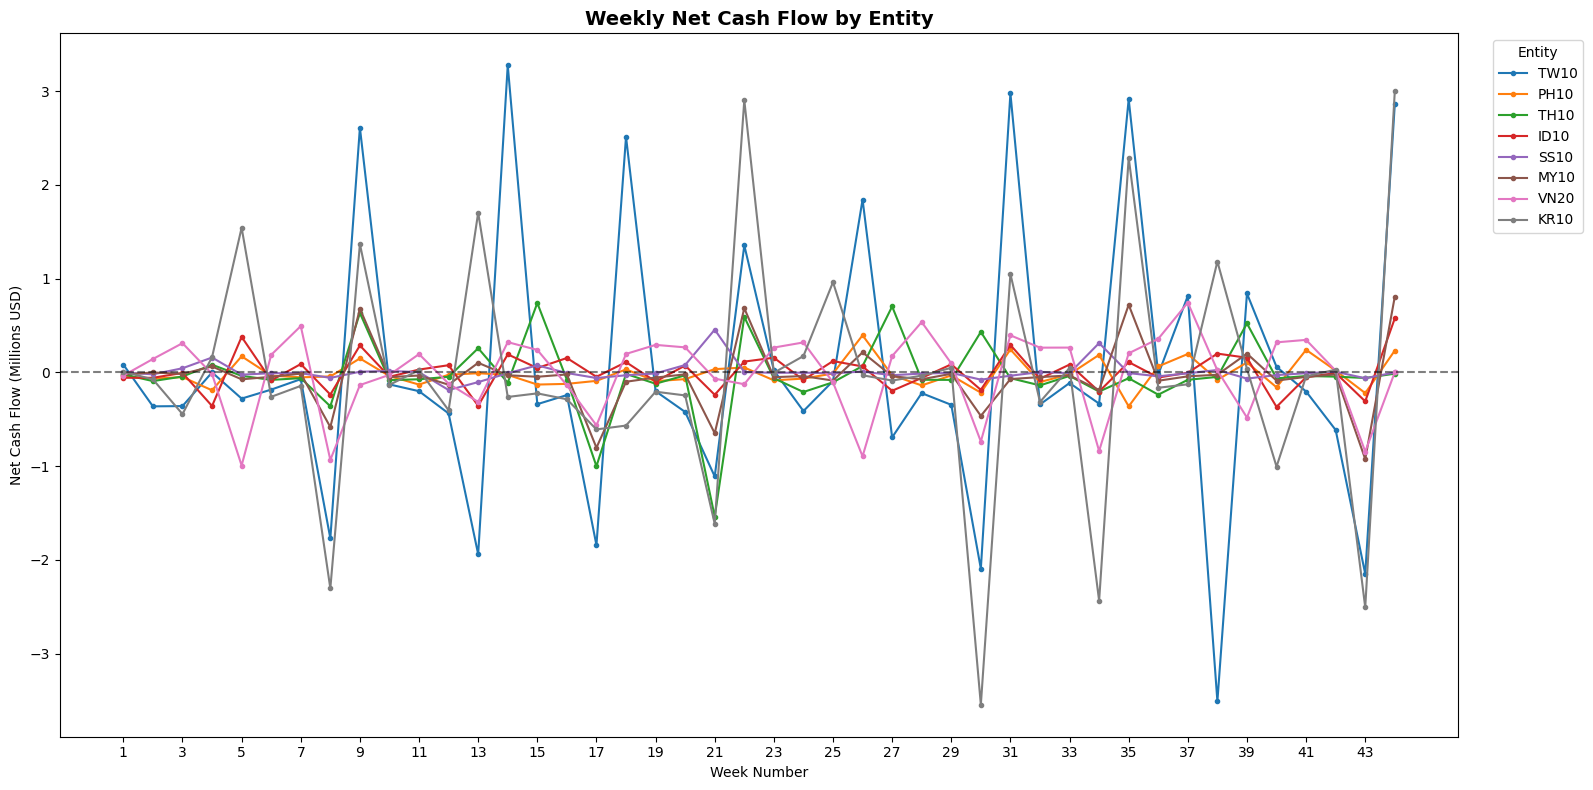

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Net cash flow by entity per week
pivot = weekly_df.pivot(index='Week_Num', columns='Entity', values='Total_Net')

fig, ax = plt.subplots(figsize=(16, 8))
for entity in entities:
    ax.plot(pivot.index, pivot[entity]/1e6, marker='o', markersize=3, label=entity, linewidth=1.5)

ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_xlabel('Week Number')
ax.set_ylabel('Net Cash Flow (Millions USD)')
ax.set_title('Weekly Net Cash Flow by Entity', fontsize=14, fontweight='bold')
ax.legend(title='Entity', bbox_to_anchor=(1.02, 1))
ax.set_xticks(range(1, 45, 2))
plt.tight_layout()
plt.savefig('../outputs/weekly_net_by_entity.png', dpi=150, bbox_inches='tight')
plt.show()

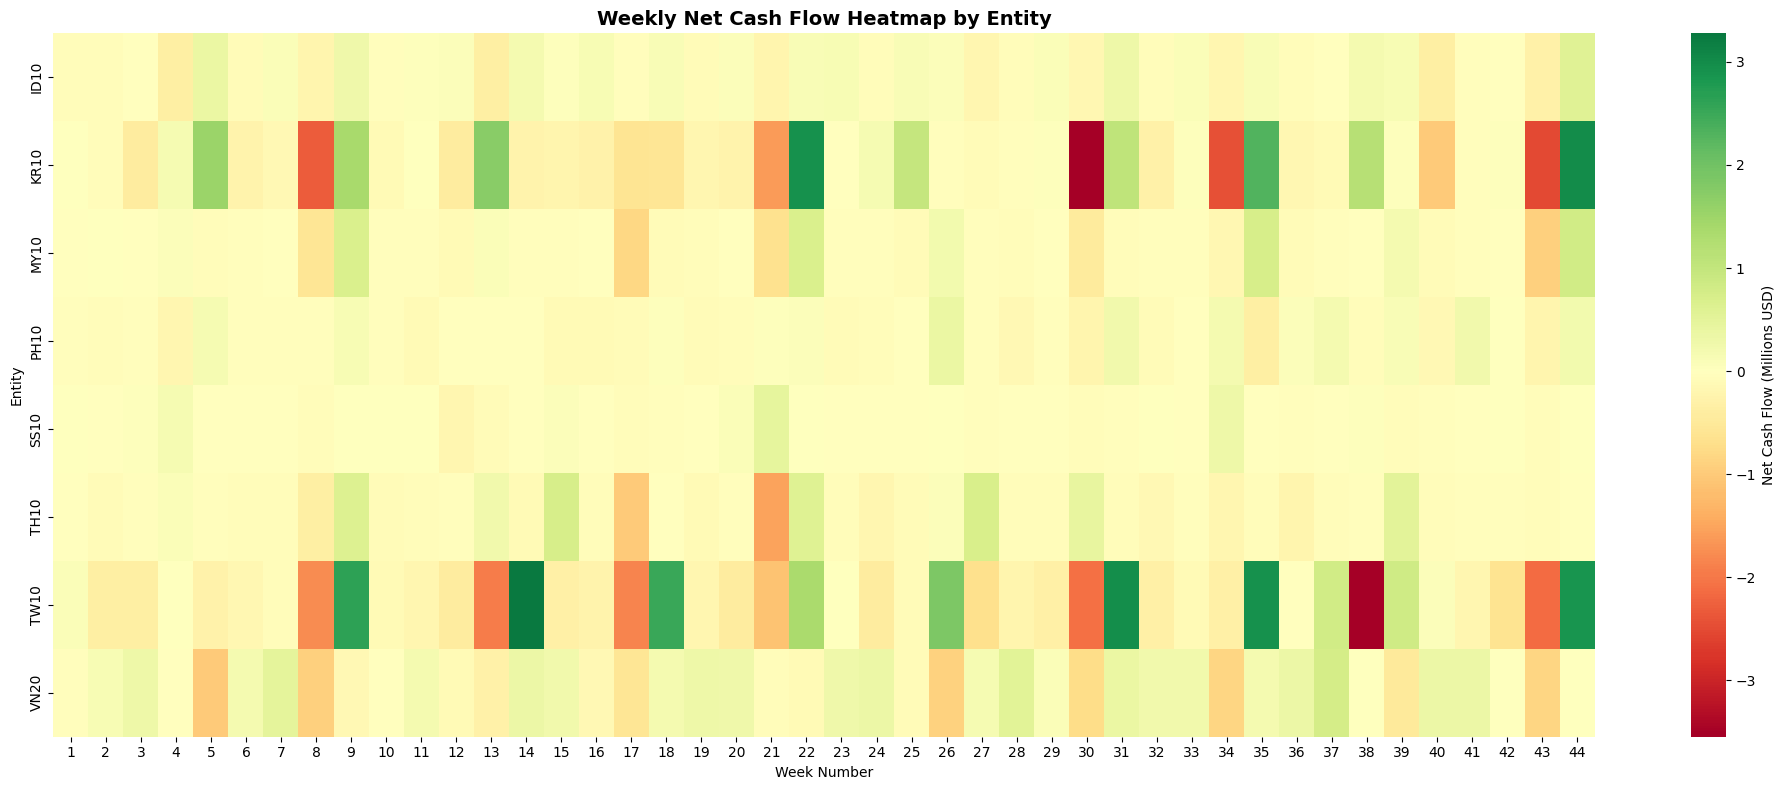

In [45]:
# Heatmap
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(pivot.T/1e6, cmap='RdYlGn', center=0, ax=ax,
            cbar_kws={'label': 'Net Cash Flow (Millions USD)'})
ax.set_title('Weekly Net Cash Flow Heatmap by Entity', fontsize=14, fontweight='bold')
ax.set_xlabel('Week Number')
ax.set_ylabel('Entity')
plt.tight_layout()
plt.savefig('../outputs/weekly_entity_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()